In [1]:
# Importing EDA Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading Used Cars Dataset
cars = pd.read_csv("Used_Cars.csv")

In [3]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [4]:
cars.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [5]:
print('(Rows, Columns): '+str(cars.shape))

(Rows, Columns): (435849, 25)


In [6]:
cars.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))
# seems like there are outliers for price and odometer

,id,price,year,odometer,county,lat,long
count,435849,435849,434732,360701,0,427614,427614
mean,7.11595e+09,134913,2009.87,98975.9,nan,38.4042,-94.9612
std,4.59085e+06,1.69086e+07,9.3125,113499,nan,6.03692,18.0586
min,7.09658e+09,0,1900,0,nan,-83.1971,-177.012
25%,7.11245e+09,4900,2007,47333,nan,34.2257,-111.731
50%,7.11709e+09,9995,2012,91188,nan,38.9348,-89.6767
75%,7.12009e+09,17989,2015,134736,nan,42.4845,-81.3973
max,7.12161e+09,3.64726e+09,2021,1e+07,nan,79.6019,173.675


In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

In [8]:
# checkig for the amount of null values
nan_count = cars.isnull().sum()
nan_count

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [9]:
# converting null count into percentage
cars.isnull().mean().sort_values(ascending=False)*100

county          100.000000
size             67.904481
vin              45.119296
condition        42.860257
cylinders        38.174689
paint_color      31.030701
drive            27.993869
type             26.868939
odometer         17.241751
manufacturer      4.760135
long              1.889416
lat               1.889416
model             1.422282
fuel              0.686247
transmission      0.492372
title_status      0.414364
year              0.256281
description       0.006195
image_url         0.005506
state             0.000000
price             0.000000
region_url        0.000000
region            0.000000
url               0.000000
id                0.000000
dtype: float64

In [10]:
# dropping columns not needed for analysis 
cars.drop(['id','url','region_url','image_url','description','vin'], axis=1, inplace=True)

# dropping columns with over 40% null values 
# (condition was kept as it could portray useful info despite high amount of nulls)
cars.drop(['county','size'], axis=1, inplace=True)

# since columns lat, long, region, state all represent location, I chose to include only state to avoid extensive categorical encoding
cars.drop(['lat','long','region'], axis=1, inplace=True)

In [11]:
# dropping rows containing null values when the respective 
# column in question has null percentage less than 5%
cars.dropna(subset=['manufacturer','model','fuel','transmission','title_status','year'],inplace=True)

In [12]:
# checking remaining columns
cars.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [13]:
# checking remaining null values to be dealt with
cars.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition       168820
cylinders       150764
fuel                 0
odometer         64758
title_status         0
transmission         0
drive           108319
type            104806
paint_color     121910
state                0
dtype: int64

In [14]:
# from previous descirbe() we saw outliers which will be dealt using the 1.5*IQR rule
def treat_outlier(col):
    sorted(col)
    q1,q3 = np.percentile(col, [25,75])
    IQR = q3 - q1
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    return lower_bound, upper_bound

# remove price outliers
plb,pub = treat_outlier(cars['price'])
# query df with price outliers removed
cars_new = cars.query('@plb <= price <= @pub')
cars_new.describe()

,price,year,odometer
count,390521.000000,390521.000000,3.271680e+05
mean,11507.074344,2010.148135,1.001116e+05
std,8754.140703,8.234406,1.066525e+05
min,0.000000,1900.000000,0.000000e+00
25%,4800.000000,2007.000000,5.075500e+04
50%,9702.000000,2012.000000,9.357300e+04
75%,16900.000000,2015.000000,1.360000e+05
max,37303.000000,2021.000000,1.000000e+07


C:\Users\tsfan\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


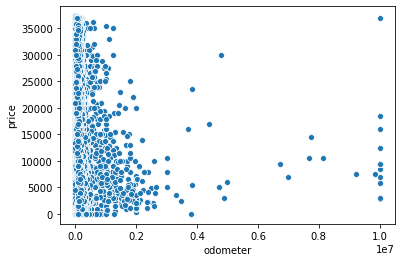

In [15]:
# Treating outlier for odometer
cars_new['odometer'].fillna(value=cars_new['odometer'].median(), inplace=True)
ax = sns.scatterplot(x='odometer',y='price',data=cars_new)
ax.get_xaxis().get_major_formatter()
ax.get_yaxis().get_major_formatter()
olb,oub = treat_outlier(cars_new['odometer'])
cars_new = cars_new.query('@olb <= odometer <= @oub')

In [16]:
cars_new.describe()

,price,year,odometer
count,382122.000000,382122.000000,382122.000000
mean,11613.761864,2010.285731,93734.117274
std,8780.623688,8.216335,48856.127373
min,0.000000,1900.000000,0.000000
25%,4900.000000,2007.000000,58901.000000
50%,9900.000000,2012.000000,93573.000000
75%,16990.000000,2015.000000,123270.000000
max,37303.000000,2021.000000,227328.000000


In [17]:
# paint color likely won't be an influential factor in determining price
cars_new.drop(['paint_color'],axis=1,inplace=True)

# use mode to impute categorical
categorical = ['condition', 'cylinders','drive','type']
for col in categorical:
    cars_new[col] = cars_new[col].fillna(cars_new['condition'].mode()[0])
cars_new.isnull().sum()


price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
state           0
dtype: int64

In [18]:
cars_new.nunique()

price           13720
year              105
manufacturer       42
model           23825
condition           6
cylinders           9
fuel                5
odometer        99437
title_status        6
transmission        3
drive               4
type               14
state              51
dtype: int64

In [19]:
# car model designation likely won't have a big influence
cars_new = cars_new.drop(['model'], axis=1)

In [20]:
# one-hot encoding categorical variables
cars_new = pd.get_dummies(cars_new, drop_first=True)
print(cars_new.columns)

Index(['price', 'year', 'odometer', 'manufacturer_alfa-romeo',
       'manufacturer_aston-martin', 'manufacturer_audi', 'manufacturer_bmw',
       'manufacturer_buick', 'manufacturer_cadillac', 'manufacturer_chevrolet',
       ...
       'state_sd', 'state_tn', 'state_tx', 'state_ut', 'state_va', 'state_vt',
       'state_wa', 'state_wi', 'state_wv', 'state_wy'],
      dtype='object', length=134)


In [21]:
# importing metrics and train/test split along with standardizing X
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

X = cars_new.loc[:, cars_new.columns != 'price']
y = cars_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# Model 1: Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=7)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print('MAE: ', mae(y_test, tree_pred))
print('RMSE: ', np.sqrt(mse(y_test, tree_pred)))
print('R-squared Score: ', r2_score(y_test, tree_pred))

MAE:  2774.9410242166914
RMSE:  5510.973354336607
R-squared Score:  0.6063624679313115


In [23]:
# Model 2: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(random_state=7, n_jobs=-1)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print('MAE: ', mae(y_test, forest_pred))
print('RMSE: ', np.sqrt(mse(y_test, forest_pred)))
print('R-squared Score: ', r2_score(y_test, forest_pred))

MAE:  2432.921711636441
RMSE:  4354.0398463533875
R-squared Score:  0.7542889565057197


In [24]:
# Model 2 - Parameter Tuning

param_rf = {
    'n_estimators': [64,128,300],
    'max_depth': [7,15,31,63,99],
    'min_samples_leaf': [1,2,4,8,12],
    'min_samples_split':[2,4,8,12],
    'max_samples':[0.5,0.75,1],
    'max_features':['sqrt','log2',0.2,0.3,0.4],
    'bootstrap': [True, False]
}

# using randomized search to save time
rs_rf = RandomizedSearchCV(forest, param_distributions=param_rf, scoring='neg_root_mean_squared_error',cv=3,n_jobs=-1,verbose=10)

In [25]:
rs_rf.fit(X_train,y_train)
rs_rf.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 17.3min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 18.2min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 19.7min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.2min finished


{'n_estimators': 300,
 'min_samples_split': 8,
 'min_samples_leaf': 12,
 'max_samples': 0.5,
 'max_features': 0.4,
 'max_depth': 99,
 'bootstrap': False}

In [26]:
# Model 2 Tuned

forest2 = RandomForestRegressor(random_state=7, 
                                n_jobs=-1,
                                n_estimators=128,
                                min_samples_split=4,
                                min_samples_leaf=1,
                                max_samples=0.75,
                                max_features=0.3,
                                max_depth=63,
                                bootstrap=False
                               )
forest2.fit(X_train, y_train)
forest_pred2 = forest2.predict(X_test)
print('MAE: ', mae(y_test, forest_pred2))
print('RMSE: ', np.sqrt(mse(y_test, forest_pred2)))
print('R-squared Score: ', r2_score(y_test, forest_pred2))

MAE:  2262.034326384679
RMSE:  4214.357383820057
R-squared Score:  0.7698014407309159


In [27]:
# Model 3: Linear Regression

from sklearn.linear_model import LinearRegression
lireg = LinearRegression()
lireg.fit(X_train, y_train)
lireg_pred = lireg.predict(X_test)
print('MAE: ', mae(y_test, lireg_pred))
print('RMSE: ', np.sqrt(mse(y_test, lireg_pred)))
print('R-squared Score: ', r2_score(y_test, lireg_pred))

MAE:  5012.121187398594
RMSE:  6925.491251222703
R-squared Score:  0.37835699971711734


In [28]:
# Model 4: XGBoost Regression

import xgboost as xgb
xgb_reg = xgb.XGBRegressor(random_state=7,tree_method='gpu_hist')
xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
print('MAE: ', mae(y_test, xgb_pred))
print('RMSE: ', np.sqrt(mse(y_test, xgb_pred)))
print('R-squared Score: ', r2_score(y_test, xgb_pred))

MAE:  3646.033277631478
RMSE:  5489.293092720192
R-squared Score:  0.6094535291127601


In [29]:
# Model 4 - Parameter Tuning

param_xgb = {
    'learning_rate': [0.01,0.05,0.1,0.2],
    'n_estimators': [100,200],
    'max_depth': [2,4,7,10,15,21],
    'subsample': [0.5,0.7,0.9],
    'colsample_bytree':[0.3,0.5,0.7,1],
    'gamma':[0.1,0.3,0.5,0.7,1,5],
    'tree_method':['gpu_hist'],
}

rs_xgb = RandomizedSearchCV(xgb_reg, param_distributions=param_xgb, scoring='neg_root_mean_squared_error',cv=2,n_jobs=-1,verbose=10)

In [30]:
rs_xgb.fit(X_train,y_train)
rs_xgb.best_params_

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:   13.0s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:   21.0s remaining:   17.1s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:   21.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:   46.2s remaining:    8.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   49.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   49.4s finished


{'tree_method': 'gpu_hist',
 'subsample': 0.9,
 'n_estimators': 200,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.3}

In [31]:
# Model 4 Tuned

xgb_reg2 = xgb.XGBRegressor(random_state=7,
                            subsample=0.9,
                            n_estimators=200,
                            max_depth=21,
                            learnig_rate=0.1,
                            gamma=0.7,
                            colsample_bytree=0.6,
                            booster='gbtree'
                            )
xgb_reg2.fit(X_train, y_train)
xgb_pred2 = xgb_reg2.predict(X_test)
print('MAE: ', mae(y_test, xgb_pred2))
print('RMSE: ', np.sqrt(mse(y_test, xgb_pred2)))
print('R-squared Score: ', r2_score(y_test, xgb_pred2))

[21:02:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learnig_rate } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


MAE:  2430.473558961224
RMSE:  4344.635597333884
R-squared Score:  0.7553492280980045


In [32]:
# Model 5: LightGBM Regression

import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor(random_state=7)
lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)
print('MAE: ', mae(y_test, lgb_pred))
print('RMSE: ', np.sqrt(mse(y_test, lgb_pred)))
print('R-squared Score: ', r2_score(y_test, lgb_pred))

MAE:  3833.1061779022466
RMSE:  5728.712888798088
R-squared Score:  0.5746426010557739


In [33]:
# Model 5 - Parameter Tuning

param_lgbr = {
    'num_leaves': [8,16,32,40,48,64,100,128],
    'max_depth': [3,6,9,15,21,25],
    'learning_rate': [0.01,0.025,0.05,0.075,0.1,0.15,0.2],
    'n_estimators': [100,250,500,1000,1500,2000],
    'boosting': ['gbdt','dart', 'rf'],
    'subsample': [0.5,0.75,1],
    'feature_fraction': [0.3,0.5,0.7,1]
}
rs_lgbr = RandomizedSearchCV(lgb_reg, param_distributions=param_lgbr, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, verbose=10)

In [34]:
rs_lgbr.fit(X_train,y_train)
rs_lgbr.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 26.1min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 26.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 32.1min finished


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7


{'subsample': 1,
 'num_leaves': 48,
 'n_estimators': 2000,
 'max_depth': 21,
 'learning_rate': 0.2,
 'feature_fraction': 0.7,
 'boosting': 'gbdt'}

In [35]:
# Model 5 Tuned

lgb_reg2 = lgb.LGBMRegressor(random_state=7,
                             num_leaves=128,
                             n_estimators=2000,
                             max_depth=25,
                             learning_rate=0.2,
                             subsample=1,
                             feature_fraction=0.9,
                             boosting='gbdt'
                            )
lgb_reg2.fit(X_train, y_train)
lgb_pred2 = lgb_reg2.predict(X_test)
print('MAE: ', mae(y_test, lgb_pred2))
print('RMSE: ', np.sqrt(mse(y_test, lgb_pred2)))
print('R-squared Score: ', r2_score(y_test, lgb_pred2))

MAE:  2784.496509421737
RMSE:  4471.217480963032
R-squared Score:  0.7408856489772455
